**Klasyfikacja danych przy użyciu algorytmów uczenia maszynowego.**

# 1. Implementacja i trening modeli

In [18]:
pip install ucimlrepo

In [19]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [20]:
heart_disease = fetch_ucirepo(id=45)

# dane wejsciowe i etykiety
X = heart_disease.data.features
y = heart_disease.data.targets
df = pd.concat([X, y], axis=1)

print("\nInformacje o zmiennych:")
print(heart_disease.variables)

print("\nPodgląd danych:")
print(X.head())


Informacje o zmiennych:
        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None        

In [21]:
print("\n>>> Liczba braków danych w każdej kolumnie:")
print(df.isna().sum())


>>> Liczba braków danych w każdej kolumnie:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [22]:
# uzupelnienie brakow mediana
df["ca"] = df["ca"].fillna(df["ca"].median())
df["thal"] = df["thal"].fillna(df["thal"].median())

# konwersja targetu na binarny
df["target_bin"] = df["num"].apply(lambda x: 0 if x == 0 else 1)

X = df.drop(columns=["num", "target_bin"])
y = df["target_bin"]

# podzial zbiorow na treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# standaryzacja
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# trenowanie modeli
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [24]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [25]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# 2. Ocena jakości klasyfikatorów

In [27]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree,
    "SVM": svm,
    "kNN": knn
}

for name, model in models.items():
    print(f"\n{name}")
    print("-" * 50)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

    print("\nConfusion matrix:")
    print(cm)

    print("\nClassification report:")
    print(classification_report(y_test, y_pred, zero_division=0))


Logistic Regression
--------------------------------------------------
Accuracy:  0.8684
Precision: 0.8378
Recall:    0.8857
F1-score:  0.8611

Confusion matrix:
[[35  6]
 [ 4 31]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.84      0.89      0.86        35

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76


Decision Tree
--------------------------------------------------
Accuracy:  0.6842
Precision: 0.6667
Recall:    0.6286
F1-score:  0.6471

Confusion matrix:
[[30 11]
 [13 22]]

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        41
           1       0.67      0.63      0.65        35

    accuracy                           0.68        76
   macro avg       0.68      0.68      0.68      

# PCA i wpływ na wyniki klasyfikacji

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("\nWyjaśniona wariancja PCA - 2 komponenty:")
print(pca.explained_variance_ratio_, " | suma =", pca.explained_variance_ratio_.sum())


Wyjaśniona wariancja PCA - 2 komponenty:
[0.74650071 0.1500777 ]  | suma = 0.8965784121159439


In [29]:
# podzial danych PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.25, random_state=42, stratify=y
)

# trenowanie modeli na PCA
log_reg_pca = LogisticRegression(max_iter=200)
log_reg_pca.fit(X_train_pca, y_train_pca)

tree_pca = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_pca.fit(X_train_pca, y_train_pca)

svm_pca = SVC(kernel='linear', C=1)
svm_pca.fit(X_train_pca, y_train_pca)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)

KNeighborsClassifier()

In [30]:
# wyniki modeli PCA
models_pca = {
    "Logistic Regression (PCA)": log_reg_pca,
    "Decision Tree (PCA)": tree_pca,
    "SVM (PCA)": svm_pca,
    "kNN (PCA)": knn_pca
}

for name, model in models_pca.items():
    print(f"\n{name}")
    print("-" * 50)

    y_pred = model.predict(X_test_pca)

    acc = accuracy_score(y_test_pca, y_pred)
    prec = precision_score(y_test_pca, y_pred, zero_division=0)
    rec = recall_score(y_test_pca, y_pred, zero_division=0)
    f1 = f1_score(y_test_pca, y_pred, zero_division=0)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")


Logistic Regression (PCA)
--------------------------------------------------
Accuracy:  0.7237
Precision: 0.7059
Recall:    0.6857
F1-score:  0.6957

Decision Tree (PCA)
--------------------------------------------------
Accuracy:  0.6974
Precision: 0.6765
Recall:    0.6571
F1-score:  0.6667

SVM (PCA)
--------------------------------------------------
Accuracy:  0.7105
Precision: 0.6857
Recall:    0.6857
F1-score:  0.6857

kNN (PCA)
--------------------------------------------------
Accuracy:  0.6579
Precision: 0.6216
Recall:    0.6571
F1-score:  0.6389


# Wizualizacja wyników z użyciem t-SNE

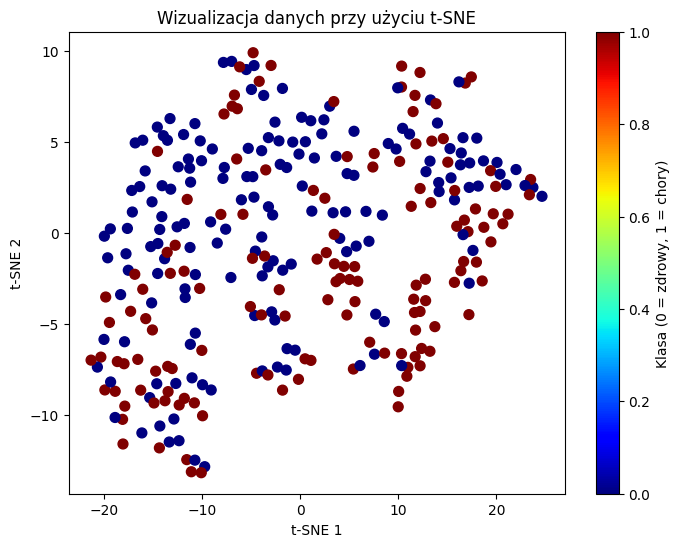

In [43]:
# wizualizacja t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='jet', s=50)
plt.title("Wizualizacja danych przy użyciu t-SNE")
plt.colorbar(label="Klasa (0 = zdrowy, 1 = chory)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()